
351
168.10308315504827
44100
Debug
Debug2
Debug3


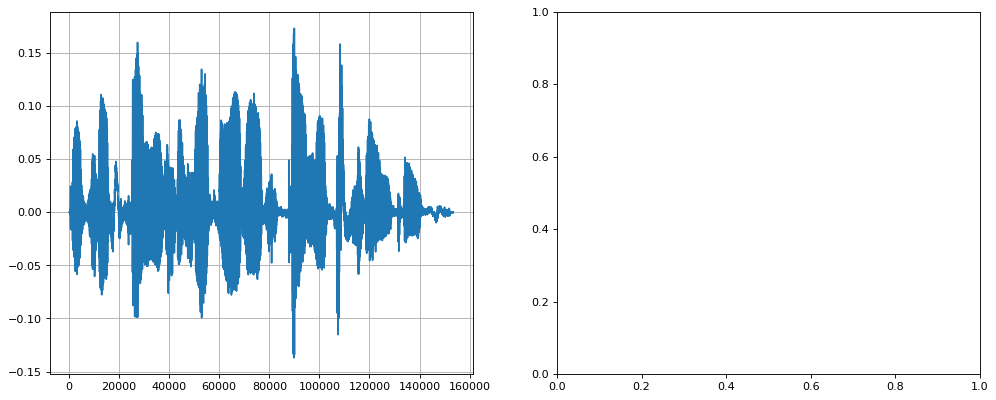

In [9]:
import sys
#sys.path.append('C:\ProgramData\Anaconda3\lib\site-packages')
from scipy.io import wavfile
from pylab import *
from numpy import *
from scipy import *
from ipywidgets import *
import matplotlib.pyplot as plt
import numpy as np
import warnings
import os
import soundfile as sf
from scipy.signal.windows import hann

%matplotlib inline

def getSingleChannel(data):
    if (isinstance(data[0], (list, tuple, np.ndarray))):
        return data.T[0]
    return data

def hps(x, Nfft, fs):
    f = np.arange(Nfft) / Nfft
    xf = np.fft.fft(x, Nfft)

    xf = np.abs(xf)
    N = f.size

    n = 5
    smallestLength = int(np.ceil(N / n))
    y = xf[:smallestLength].copy()
    for i in range(2, n + 1):
        y *= xf[::i][:smallestLength]
    f = f[:smallestLength] * fs
    return (y, f)

print()
#warnings.simplefilter("ignore")
 
#filePath = 'trainall⁩//001_K.wav'

filePath = '/Users/wolix/Documents/python_projects/KCK/signalRecognition/trainall/001_K.wav'

signal, samplerate = sf.read(filePath)
signal = np.asarray(signal)

signal = getSingleChannel(signal)
length = len(signal)
baseSignal = signal[int(length / 5):int((length / 5) * 4)] 

[hpsY, hpsX] = hps(baseSignal * hann(len(baseSignal)), baseSignal.size, samplerate)

maxY = np.argmax(hpsY[25:])
print(maxY)
print(hpsX[maxY])


print(samplerate)

w = samplerate
n = len(signal)
x = range(0,len(signal))

print('Debug')
fig = plt.figure(figsize=(15, 6), dpi=80)
ax = fig.add_subplot(121)
plt.plot(x, signal)
 
plt.grid()
print('Debug2')
signal1 = fft(signal)
signal1 = abs(signal1) / len(signal) * 2
freqs = np.arange(0, w, w / n)

ax = fig.add_subplot(122)
#plt.stem(freqs, signal1, '-*')
print('Debug3')
plt.show()

In [ ]:

workFlow = getSingleChannel(data)
length = len(workFlow)
baseSignal = workFlow[int(length / 5):int((length / 5) * 4)]  # setting range